## PSTAT 160A Summer 2023 Python Homework 1

**Release date:** Monday, August 7th <br>
**Due date:** Wednesday, August 16th, 11:59 p.m. via Gradescope

**Instructions:** Please upload your IPYNB file on Gradescope with filename "PythonHW1_YOURPERMNUMBER".


As usual, we start with loading some packages:

In [10]:
import numpy as np
import random

## Problem 1 (5 points)

1. Implement the simulation of a biased 6-sided die which takes the values 1,2,3,4,5,6 with probabilities 0.15,0.25,0.05,0.25,0.10,0.2.

In [3]:
import numpy.random as npr
npr.seed(160)
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!

def biased_die_roll(n):
    # Define values and their corresponding probabilities
    values = [1, 2, 3, 4, 5, 6]
    probs = [0.15, 0.25, 0.05, 0.25, 0.10, 0.20]
    cumulative_probs = [sum(probs[:i+1]) for i in range(len(probs))]

    # Create a list of distribution of values and their corresponding cumulative probabilities
    cum_dist = list(zip(values, cumulative_probs))

    # Start an empty simulated list
    simulated_list = []

    for _ in range(n):
        # Generate a random number between 0 and 1
        random_number = random.random()

        # Find the value associated with the generated random number
        for value, cumulative_prob in cum_dist:
            if random_number <= cumulative_prob:
                simulated_list.append(value)
                break

    return simulated_list



2. Plot a histogram with results of 1,000 simulations. Check if the relative counts of each die outcome are approximately equal to the corresponding specified probabilities.

_Remark:_ Specify the bins of your histogram correctly.

(array([0.176, 0.246, 0.053, 0.226, 0.089, 0.21 ]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

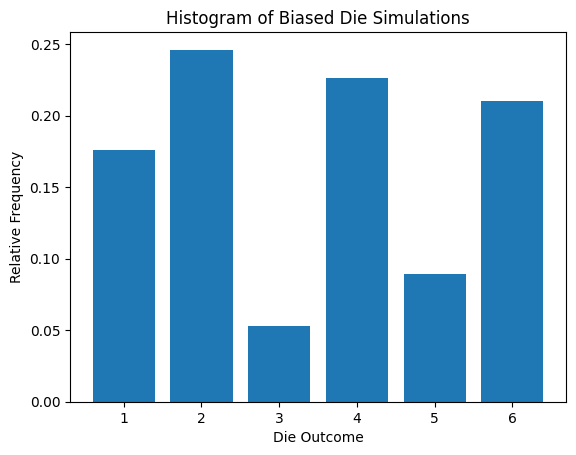

In [13]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
import matplotlib
import matplotlib.pyplot as plt

# Simulate 1000 simulations roll and store the results
simulation = 1000
simulated_results = biased_die_roll(simulation)

# Plotting the histogram

plt.xlabel('Die Outcome')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Biased Die Simulations')
plt.hist(simulated_results, bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], density = True, rwidth = 0.8)

3. Plot a histogram with results of 100,000 simulations. Compare again the relative counts of each die outcomes to the specified probabilities. What do you find (summarize in 2-3 sentences).



(array([0.15058, 0.25018, 0.0494 , 0.24848, 0.10046, 0.2009 ]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

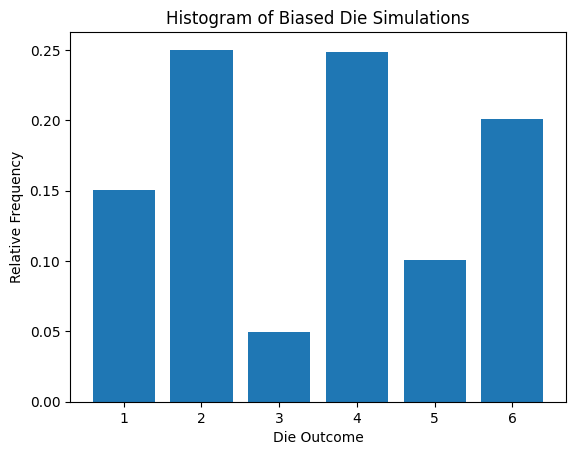

In [22]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
# Simulate 100000 simulations roll and store the results
simulation = 100000
simulated_results = biased_die_roll(simulation)

# Plotting the histogram

plt.xlabel('Die Outcome')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Biased Die Simulations')
plt.hist(simulated_results, bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], density = True, rwidth = 0.8)
# I find out that realative frequency corredsponding with the die outcomes from 10000 simulations become closer to the probabilities we set than do 1000 simulations.
# This could imply that more times of trail we do, more accurate result we get."


## Problem 2 (5 Points)

Every day Mike goes to get coffee at Dune Coffee, and randomly orders one of cappuccino, latte, macchiato, espresso or flat white -- 5 choices that he picks uniformly at random.

1. Implement a simulator which uniformly samples from one of the 5 drinks above:

In [ ]:
np.random.seed(1000)
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!
import random

def random_coffee(n):
    # define the choices of coffee
    coffee_choices = ["cappuccino", "latte", "macchiato", "espresso", "flat white"]
    # staring an empty list of simulated coffee
    simulated_coffee = []

    for _ in range(n):
        random_choice = random.choice(coffee_choices)
        simulated_coffee.append(random_choice)

    return simulated_coffee

2. On the day that Mike first picks **espresso**, find the empricial _mean_ and empirical _standard deviation_ of the number of prior days in which he picked a **latte** by running 100,000 simulations. [This question is conceptually similar to the question about rolling 5's before the first '6' appears that was done in one of the videos -- now we re-solve it/verify the answer by simulation]



In [ ]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# BE SURE TO ADD SOME COMMENTS TO YOUR CODE!


In [19]:
npr.seed(1000)

def simulate_coffee():
    coffee_choices = ["cappuccino", "latte", "macchiato", "espresso", "flat white"]
    espresso = False
    latte_count_before_e = 0

    while not espresso:
        # get random coffee choice
        coffee = npr.choice(coffee_choices)

        if coffee == "espresso":
            espresso = True
        elif coffee == "latte":
            latte_count_before_e += 1

    return latte_count_before_e

# Simulate 100,000 times and store latte counts before picking espresso
simulations = 100000
latte_counts = []

for _ in range(simulations):
  latte_count = simulate_coffee()
  latte_counts.append(latte_count)

# Finding empirical mean and empirical standard deviation
empirical_mean = np.mean(latte_counts)
empirical_std = np.std(latte_counts)

print("Empirical Mean:", empirical_mean)
print("Empirical Standard Deviation:", empirical_std)

Empirical Mean: 1.0022
Empirical Standard Deviation: 1.415943205075684
